<a href="https://colab.research.google.com/github/UVR-Dilishaka/SignLanguageTutor/blob/main/SSL_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Step 1: Load the dataset
file_path = '/content/PCA_results.8.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [12]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.274355 -0.096344  1.083427 -0.779993  0.733224  0.499635 -1.212490   
1  3.097952 -0.523544  1.495265 -0.142860  0.683907 -0.164014 -0.978976   
2  3.470452 -0.318442  1.639695 -0.478387  0.878706  0.271496 -0.161314   
3  3.197982 -0.301340  1.534107 -0.769627  0.886398  0.445042 -0.595537   
4  2.916098  0.137352  1.541440 -1.324139  0.369705  0.771748 -1.421975   

        PC8  label  
0  0.127588      1  
1  0.292278      1  
2  0.013030      1  
3  0.384700      1  
4  0.418969      1  


In [13]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

# Step 4: Separate features and labels
if 'label' in data.columns:
    features = data.drop(columns=['label'])  # Dropping the label column
    labels = data['label']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

No missing values detected.
Features and labels separated successfully.


In [14]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (140, 8)
Testing set size: (35, 8)


In [15]:
# Step 6: Initialize the KNN model
k_neighbors = 5  # You can tune this hyperparameter
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
print(f"Initialized KNN with {k_neighbors} neighbors.")

Initialized KNN with 5 neighbors.


In [16]:
# Step 7: Train the KNN model
knn.fit(X_train, y_train)
print("KNN model trained successfully.")

KNN model trained successfully.


In [17]:
# Step 8: Make predictions on the test set
y_pred = knn.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [18]:
# Step 9: Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Accuracy: {accuracy:.2f}")


KNN Model Accuracy: 0.66


In [19]:
# Step 10: Display the classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred))


Classification Report for KNN:
              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.75      0.75      0.75         8
           4       1.00      0.50      0.67         2
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       1.00      0.33      0.50         3
          12       0.25      1.00      0.40         1
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.50      1.00      0.67         2
          17       0.00      0.00      0.00         0
          18       1.00      1.00      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

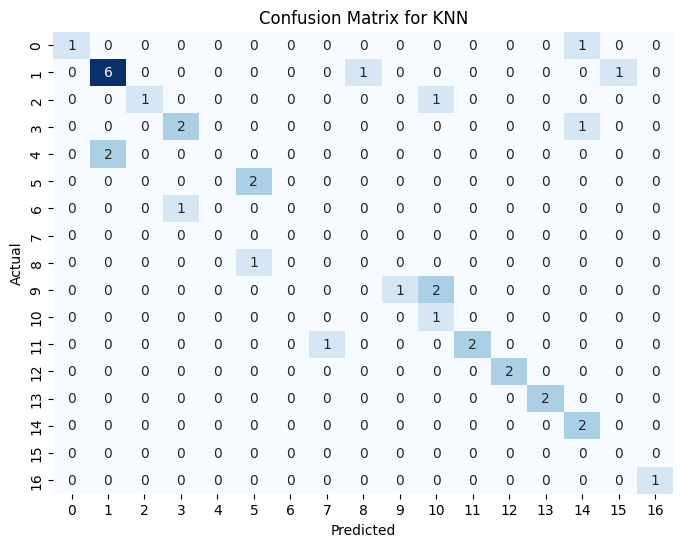

In [20]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

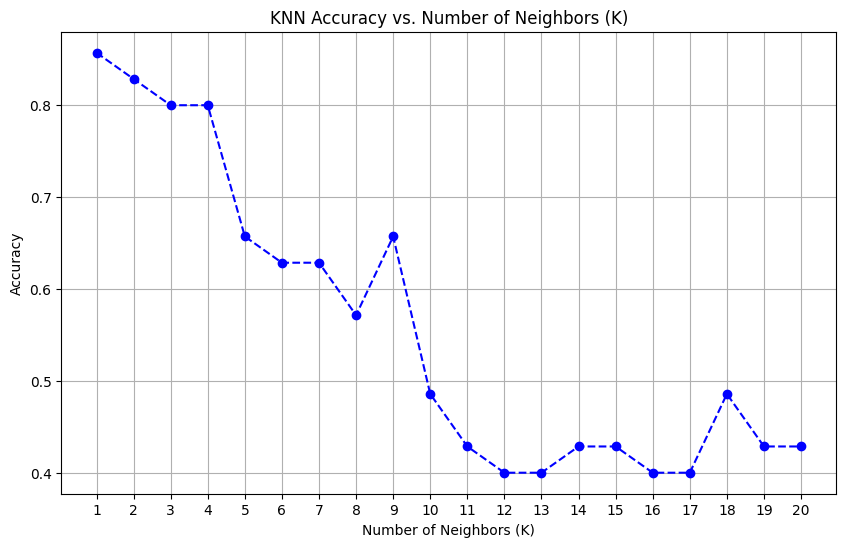

In [22]:
# Step 12: Visualize the relationship between K values and accuracy
k_values = range(1, 21)
accuracies = []

for k in k_values:
    temp_knn = KNeighborsClassifier(n_neighbors=k)
    temp_knn.fit(X_train, y_train)
    temp_pred = temp_knn.predict(X_test)
    temp_accuracy = accuracy_score(y_test, temp_pred)
    accuracies.append(temp_accuracy)

# Plotting accuracies vs. K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [23]:
# Step 13: Highlight the best K value
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"The best K value is {best_k} with an accuracy of {best_accuracy:.2f}.")

The best K value is 1 with an accuracy of 0.86.
